# Tutorial 8: Outputs

Once an instance of GenX is run, a series of csv files describing the outputs are created and put in to a folder titled `results`. This folder will appear automatically in the case folder. For a detailed description of all files, see the <a href="https://genxproject.github.io/GenX.jl/dev/User_Guide/model_output/" target="_blank">documentation</a> . This tutorial goes over key files in `results` and visualizes some of the outputs.

### Table of Contents
* [Power](#power)
* [Cost and Revenue](#cost)
* [Emmissions](#emms)

Let's get things started by running an instance of GenX using `Run.jl`. You can skip this step if you already have a results folder you would like to analyze. 

In [1]:
using DataFrames
using CSV
using YAML
using GraphRecipes
using Plots
using PlotlyJS
using VegaLite
using StatsPlots

WebIO._IJuliaInit()

In [2]:
case = joinpath("example_systems/1_three_zones");

In [ ]:
include("example_systems/1_three_zones/Run.jl")

Below are all 33 files output by running GenX:

In [3]:
results = cd(readdir,joinpath(case,"results"))

33-element Vector{String}:
 "CO2_prices_and_penalties.csv"
 "ChargingCost.csv"
 "EnergyRevenue.csv"
 "FuelConsumption_plant_MMBTU.csv"
 "FuelConsumption_total_MMBTU.csv"
 "Fuel_cost_plant.csv"
 "MinCapReq_prices_and_penalties.csv"
 "NetRevenue.csv"
 "RegSubsidyRevenue.csv"
 "SubsidyRevenue.csv"
 "capacity.csv"
 "capacityfactor.csv"
 "charge.csv"
 ⋮
 "power.csv"
 "power_balance.csv"
 "prices.csv"
 "reliability.csv"
 "run_settings.yml"
 "shutdown.csv"
 "start.csv"
 "status.csv"
 "storage.csv"
 "storagebal_duals.csv"
 "time_weights.csv"
 "tlosses.csv"

### Power <a id="power"></a>

The file `power.csv`, shown below,  outputs the power in MW discharged by each node at each time step. Note that if TimeDomainReduction is in use the file will be shorter. The first row states which zone each node is part of, and the total power per year is located in the second row. After that, each row represents one time step of the series.

In [4]:
power =  CSV.read(joinpath(case,"results/power.csv"),DataFrame,missingstring="NA")

Row,Resource,MA_natural_gas_combined_cycle,CT_natural_gas_combined_cycle,ME_natural_gas_combined_cycle,MA_solar_pv,CT_onshore_wind,CT_solar_pv,ME_onshore_wind,MA_battery,CT_battery,ME_battery,Total
,String15,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,Zone,1.0,2.0,3.0,1.0,2.0,2.0,3.0,1.0,2.0,3.0,0.0
2,AnnualSum,1.06299e7,3.39798e6,8.66132e5,2.91804e7,3.31307e7,2.22411e7,2.34443e7,1.15214e7,1.29157e7,2.44304e6,1.49771e8
3,t1,0.0,0.0,0.0,0.0,8752.01,0.0,6123.06,1633.88,2164.51,0.0,18673.5
4,t2,0.0,0.0,0.0,0.0,8573.11,0.0,6083.89,1489.78,2212.78,0.0,18359.6
5,t3,0.0,0.0,0.0,0.0,9022.55,0.0,257.08,3400.83,1967.98,883.71,15532.1
6,t4,0.0,0.0,0.0,0.0,7910.99,0.0,6055.77,1389.86,2515.72,0.0,17872.3
7,t5,0.0,0.0,0.0,0.0,6669.93,0.0,2024.5,3397.82,3143.78,0.0,15236.0
8,t6,0.0,0.0,0.0,0.0,7214.48,0.0,6093.93,1531.45,2904.15,0.0,17744.0
9,t7,0.0,0.0,0.0,0.0,8001.08,0.0,6150.17,1733.3,2568.6,0.0,18453.2


Below is a visualization of the production over the first 168 hours, with the load demand curve from all three zones plotted on top:

In [5]:
# Pre-processing
tstart = 3
tend = 170
names_power = ["Natural_Gas","Solar","Wind","Battery"]

power_tot = DataFrame([power[!,2]+power[!,3]+power[!,4] power[!,4]+power[!,6] power[!,5]+power[!,7] power[!,8]+power[!,9]+power[!,10]],
    ["Natural_Gas","Solar","Wind","Battery"])

power_plot = DataFrame([collect(1:length(power_tot[tstart:tend,1])) power_tot[tstart:tend,1] repeat([names_power[1]],length(power_tot[tstart:tend,1]))],
    ["Hour","MW", "Resource_Type"]);

for i in range(2,4)
    power_plot_temp = DataFrame([collect(1:length(power_tot[tstart:tend,i])) power_tot[tstart:tend,i] repeat([names_power[i]],length(power_tot[tstart:tend,i]))],["Hour","MW", "Resource_Type"])
    power_plot = [power_plot; power_plot_temp]
end

loads =  CSV.read(joinpath(case,"system/Demand_data.csv"),DataFrame,missingstring="NA")
loads_tot = loads[!,"Demand_MW_z1"]+loads[!,"Demand_MW_z2"]+loads[!,"Demand_MW_z3"]
power_plot[!,"Demand_Total"] = repeat(loads_tot[tstart:tend],4);
power_plot

Row,Hour,MW,Resource_Type,Demand_Total
,Any,Any,Any,Int64
1,1,0.0,Natural_Gas,10105
2,2,0.0,Natural_Gas,9878
3,3,0.0,Natural_Gas,9843
4,4,0.0,Natural_Gas,10017
5,5,0.0,Natural_Gas,10390
6,6,0.0,Natural_Gas,10727
7,7,0.0,Natural_Gas,11298
8,8,0.0,Natural_Gas,11859
9,9,0.0,Natural_Gas,12196


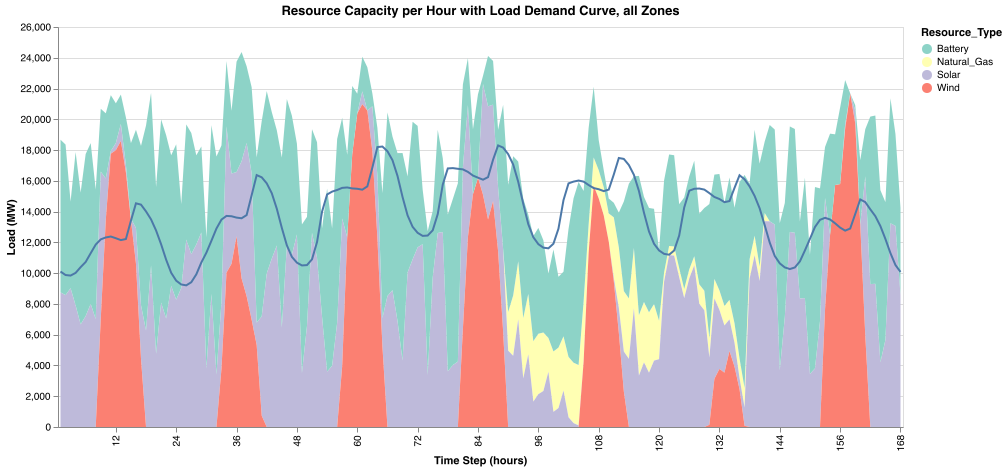

In [6]:
power_plot  |>
@vlplot()+
@vlplot(mark={:area},
    x={:Hour,title="Time Step (hours)",labels="Resource_Type:n",axis={values=0:12:168}}, y={:MW,title="Load (MW)",type="quantitative"},
    color={"Resource_Type:n",scale={scheme="set3"}},width=845,height=400)+
@vlplot(mark=:line,x=:Hour,y=:Demand_Total,labels="Demand_Type:n",title="Resource Capacity per Hour with Load Demand Curve, all Zones")


In [ ]:
Plots.heatmap(collect(1:length(power[3:end,2])),power[3:end,2],c = :thermal)

We can separate it by zone in the following plot:

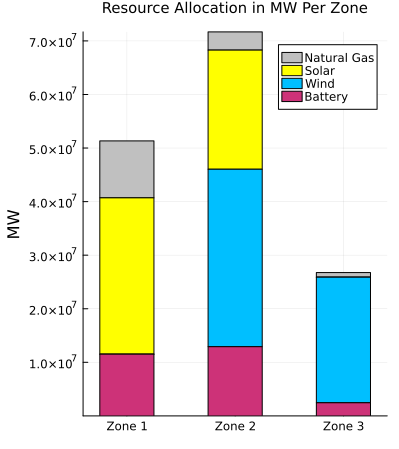

In [8]:
Zone1 = [power[2,2] power[2,5] 0 power[2,9]]
Zone2 = [power[2,3] power[2,7] power[2,6] power[2,10]]
Zone3 = [power[2,4] 0 power[2,8] power[2,11]]

colors=[:silver :yellow :deepskyblue :violetred3]

groupedbar(["Zone 1", "Zone 2", "Zone 3"],[Zone1; Zone2; Zone3], bar_position = :stack, bar_width=0.5,size=(400,450),
    labels=["Natural Gas" "Solar" "Wind" "Battery"],
    title="Resource Allocation in MW Per Zone",ylabel="MW",color=colors, titlefontsize=10)

### Cost and Revenue <a id="cost"></a>

The basic cost of each power plant and the revenue it generates can be found in files `costs.csv`, `NetRevenue.csv`,and `EnergyRevenue.csv`. `NetRevenue.csv` breaks down each specific cost per node in each zone, which is useful to visualize what the cost is coming from.

In [9]:
netrevenue =  CSV.read(joinpath(case,"results/NetRevenue.csv"),DataFrame,missingstring="NA")

Row,region,Resource,zone,Cluster,R_ID,Inv_cost_MW,Inv_cost_MWh,Inv_cost_charge_MW,Fixed_OM_cost_MW,Fixed_OM_cost_MWh,Fixed_OM_cost_charge_MW,Var_OM_cost_out,Fuel_cost,Var_OM_cost_in,StartCost,Charge_cost,CO2SequestrationCost,EnergyRevenue,SubsidyRevenue,OperatingReserveRevenue,OperatingRegulationRevenue,ReserveMarginRevenue,ESRRevenue,EmissionsCost,RegSubsidyRevenue,Revenue,Cost,Profit
,String3,String31,Int64,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,MA,MA_natural_gas_combined_cycle,1,1,1,5.42531e8,0.0,0.0,8.53367e7,0.0,0.0,3.77362e7,2.18055e8,0.0,3.50816e7,0.0,0.0,3.28687e9,0.0,0.0,0.0,0.0,0.0,2.36813e9,0.0,3.28687e9,3.28687e9,5.24521e-6
2,CT,CT_natural_gas_combined_cycle,2,1,2,1.34269e8,0.0,0.0,1.99104e7,0.0,0.0,1.21308e7,5.10261e7,0.0,1.04779e7,0.0,0.0,9.9036e8,0.0,0.0,0.0,0.0,0.0,7.62546e8,0.0,9.9036e8,9.9036e8,4.17233e-6
3,ME,ME_natural_gas_combined_cycle,3,1,3,3.48629e7,0.0,0.0,8.68428e6,0.0,0.0,3.89759e6,2.21269e7,0.0,4.02664e6,0.0,0.0,2.54206e8,0.0,0.0,0.0,0.0,0.0,1.80607e8,0.0,2.54206e8,2.54206e8,-5.06639e-7
4,MA,MA_solar_pv,1,1,4,1.55689e9,0.0,0.0,3.42407e8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8993e9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8993e9,1.8993e9,-4.76837e-7
5,CT,CT_onshore_wind,2,1,5,1.30076e9,0.0,0.0,5.78181e8,0.0,0.0,3.31307e6,0.0,0.0,0.0,0.0,0.0,1.88225e9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.88225e9,1.88225e9,-4.76837e-7
6,CT,CT_solar_pv,2,1,6,1.15846e9,0.0,0.0,2.54779e8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.41324e9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.41324e9,1.41324e9,0.0
7,ME,ME_onshore_wind,3,1,7,1.13104e9,0.0,0.0,5.02741e8,0.0,0.0,2.34443e6,0.0,0.0,0.0,0.0,0.0,1.63612e9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.63612e9,1.63612e9,-6.19888e-6
8,MA,MA_battery,1,0,8,8.40981e7,5.4962e8,0.0,2.10202e7,1.37368e8,0.0,1.72822e6,0.0,2.04184e6,0.0,3.62383e8,0.0,1.09972e9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.09972e9,1.15826e9,-5.85375e7
9,CT,CT_battery,2,0,9,9.0708e7,3.84011e8,0.0,2.26724e7,9.5977e7,0.0,1.93735e6,0.0,2.28893e6,0.0,4.58709e8,0.0,9.87316e8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.87316e8,1.0563e9,-6.89868e7


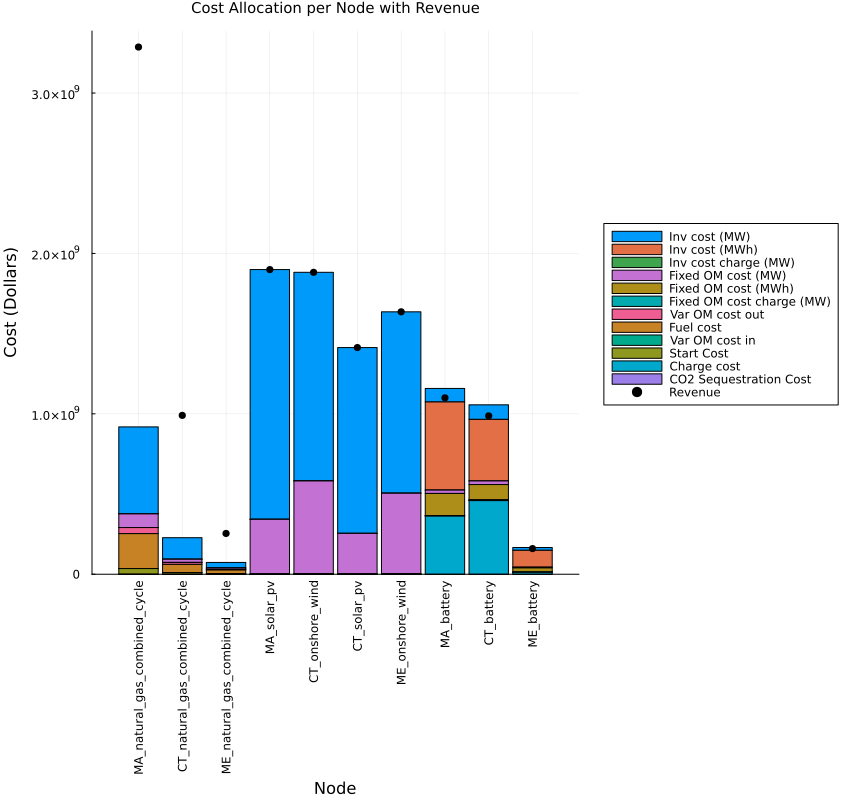

In [13]:
xnames = netrevenue[!,2]
names1 =  ["Inv cost (MW)" "Inv cost (MWh)" "Inv cost charge (MW)" "Fixed OM cost (MW)" "Fixed OM cost (MWh)" "Fixed OM cost charge (MW)" "Var OM cost out" "Fuel cost" "Var OM cost in" "Start Cost" "Charge cost" "CO2 Sequestration Cost" "Revenue"]

groupedbar(xnames,Matrix(netrevenue[1:end,6:17]), bar_position = :stack, bar_width=0.9,size=(850,800),
    labels=names1,title="Cost Allocation per Node with Revenue",xlabel="Node",ylabel="Cost (Dollars)", 
    titlefontsize=10,legend=:outerright,ylims=[0,maximum(netrevenue[!,"Revenue"])+1e8],xrotation = 90)
StatsPlots.scatter!(xnames,netrevenue[!,"Revenue"],label="Revenue",color="black")

The file `costs.csv` reports a similar set of costs, grouped by zone.

In [14]:
costs =  CSV.read(joinpath(case,"results/costs.csv"),DataFrame)

Row,Costs,Total,Zone1,Zone2,Zone3
,String31,Float64,String31,String31,String31
1,cTotal,9.6731e9,3.6139178319670496e9,4.1208958993550825e9,1.8641852859537935e9
2,cFix,9.18999e9,3.319275223543471e9,4.039721777020468e9,1.8309902953651001e9
3,cVar,6.82178e7,4.150626796526125e7,1.967012911391829e7,7.041439374250781e6
4,cFuel,2.91208e8,2.180547790952983e8,5.1026074871340685e7,2.2126909419475567e7
5,cNSE,0.0,0.0,0.0,0.0
6,cStart,4.95861e7,3.5081561363019414e7,1.04779183493546e7,4.026641794967072e6
7,cUnmetRsv,0.0,-,-,-
8,cNetworkExp,7.4099e7,-,-,-
9,cUnmetPolicyPenalty,0.0,-,-,-


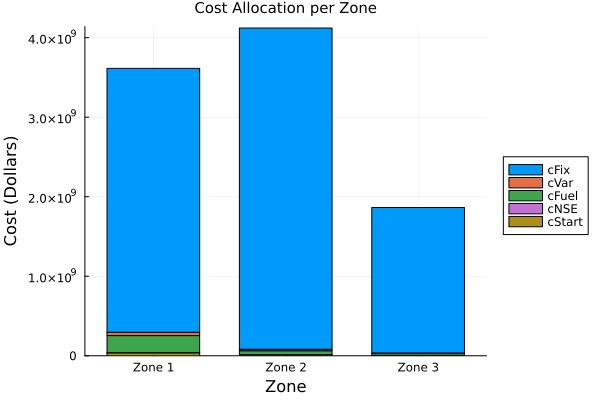

In [15]:
names2 = ["cFix" "cVar" "cFuel" "cNSE" "cStart" "cUnmetRsv" "cNetworkExp" "cUnmetPolicyPenalty" "cCO2"]
new_costs = parse.(Float64,costs[2:6,3:5])
groupedbar(["Zone 1","Zone 2","Zone 3"],transpose(Matrix(new_costs)), bar_position = :stack, bar_width=0.7,
    labels=names2,title="Cost Allocation per Zone",xlabel="Zone",ylabel="Cost (Dollars)",
    ylim=[0,maximum(new_costs[!,2])+1e8],titlefontsize=10,legend=:outerright)

As you can see, the fixed costs for each zone make up the majority of the total cost.

### Emissions  <a id="emms"></a>

The file `emmissions.csv` gives the total CO2 emmissions per zone for each hour GenX runs. The first three rows give the marginal CO2 abatement cost in $/ton CO2.

In [16]:
emm1 =  CSV.read(joinpath(case,"results/emissions.csv"),DataFrame)

Row,Zone,1,2,3,Total
,String15,Float64,Float64,Float64,Float64
1,CO2_Price_1,559.94,0.0,0.0,0.0
2,CO2_Price_2,0.0,588.658,0.0,0.0
3,CO2_Price_3,0.0,0.0,309.006,0.0
4,AnnualSum,4.22926e6,1.2954e6,5.84478e5,6.10913e6
5,t1,0.0,0.0,0.0,0.0
6,t2,0.0,0.0,0.0,0.0
7,t3,0.0,0.0,0.0,0.0
8,t4,0.0,0.0,0.0,0.0
9,t5,0.0,0.0,0.0,0.0


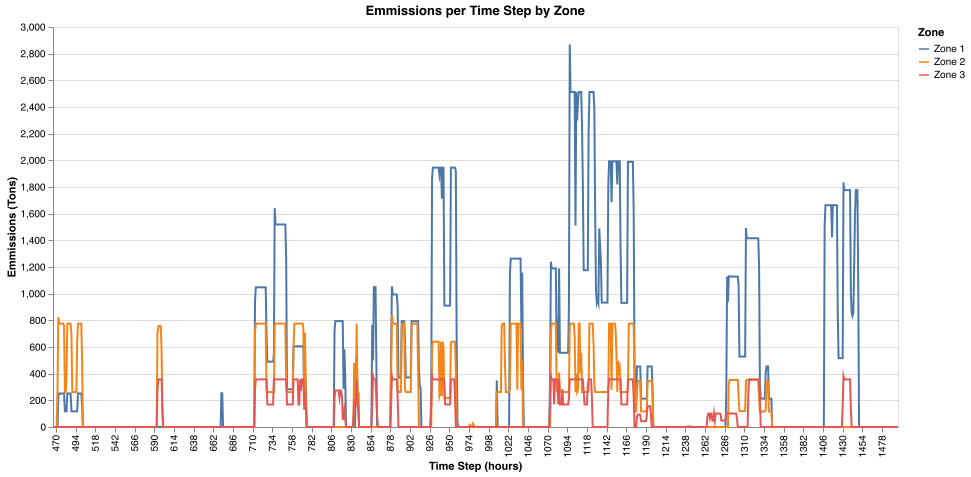

In [17]:
# Pre-processing
tstart = 470
tend = 1500
names_emm = ["Zone 1","Zone 2","Zone 3"]

emm_tot = DataFrame([emm1[3:end,2] emm1[3:end,3] emm1[3:end,4]],
    ["Zone 1","Zone 2","Zone 3"])


emm_plot = DataFrame([collect((tstart-3):(tend-3)) emm_tot[tstart:tend,1] repeat([names_emm[1]],(tend-tstart+1))],
    ["Hour","MW","Zone"]);

for i in range(2,3)
    emm_plot_temp = DataFrame([collect((tstart-3):(tend-3)) emm_tot[tstart:tend,i] repeat([names_emm[i]],(tend-tstart+1))],["Hour","MW","Zone"])
    emm_plot = [emm_plot; emm_plot_temp]
end

emm_plot  |>
@vlplot(mark={:line},
    x={:Hour,title="Time Step (hours)",labels="Zone:n",axis={values=tstart:24:tend}}, y={:MW,title="Emmissions (Tons)",type="quantitative"},
    color={"Zone:n"},width=845,height=400,title="Emmissions per Time Step by Zone")

Let's try changing the CO2 cap, as in Tutorial 7, and plotting the resulting emmissions.

In [ ]:
genx_settings_TZ = YAML.load(open((joinpath(case,"settings/genx_settings.yml"))))
genx_settings_TZ["CO2Cap"] = 0
YAML.write_file((joinpath(case,"settings/genx_settings.yml")), genx_settings_TZ)
genx_settings_TZ = YAML.load(open((joinpath(case,"settings/genx_settings.yml"))))

include("example_systems/1_three_zones/Run.jl")

In [18]:
emm2 =  CSV.read(joinpath(case,"results_1/emissions.csv"),DataFrame)

Row,Zone,1,2,3,Total
,String15,Float64,Float64,Float64,Float64
1,AnnualSum,1.60736e7,1.4358e7,0.0,3.04316e7
2,t1,2382.77,0.0,0.0,2382.77
3,t2,2273.39,0.0,0.0,2273.39
4,t3,2064.25,0.0,0.0,2064.25
5,t4,2354.07,0.0,0.0,2354.07
6,t5,2746.08,0.0,0.0,2746.08
7,t6,2715.03,0.0,0.0,2715.03
8,t7,2712.87,0.0,0.0,2712.87
9,t8,3245.89,0.0,0.0,3245.89


In [19]:
# Pre-processing
tstart = 470
tend = 1500
names_emm = ["Zone 1","Zone 2","Zone 3"]

emm_tot2 = DataFrame([emm2[3:end,2] emm2[3:end,3] emm2[3:end,4]],
    ["Zone 1","Zone 2","Zone 3"])


emm_plot2 = DataFrame([collect((tstart-3):(tend-3)) emm_tot2[tstart:tend,1] repeat([names_emm[1]],(tend-tstart+1))],
    ["Hour","MW","Zone"]);

for i in range(2,3)
    emm_plot_temp = DataFrame([collect((tstart-3):(tend-3)) emm_tot2[tstart:tend,i] repeat([names_emm[i]],(tend-tstart+1))],["Hour","MW","Zone"])
    emm_plot2 = [emm_plot2; emm_plot_temp]
end

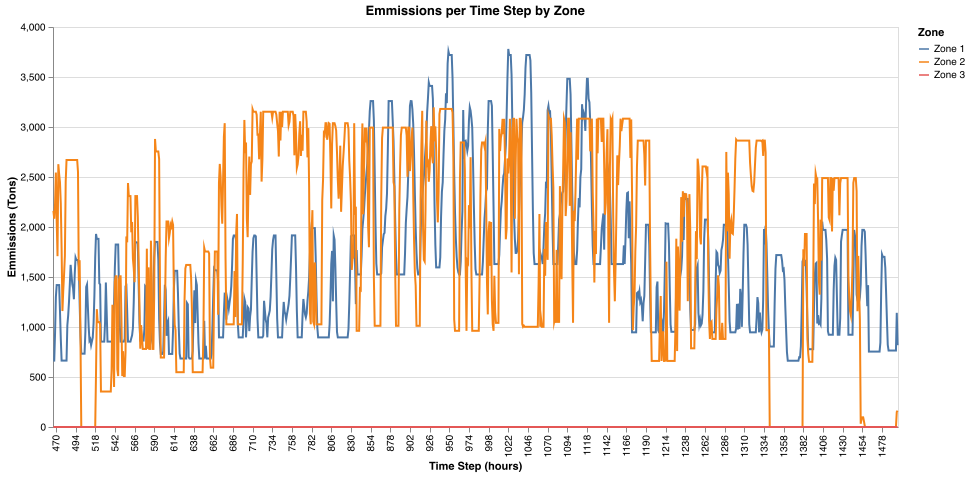

In [20]:
emm_plot2  |>
@vlplot(mark={:line},
    x={:Hour,title="Time Step (hours)",labels="Zone:n",axis={values=tstart:24:tend}}, y={:MW,title="Emmissions (Tons)",type="quantitative"},
    color={"Zone:n"},width=845,height=400,title="Emmissions per Time Step by Zone")

We can see how the emmissions, summed over all zones, compare in the following plot:

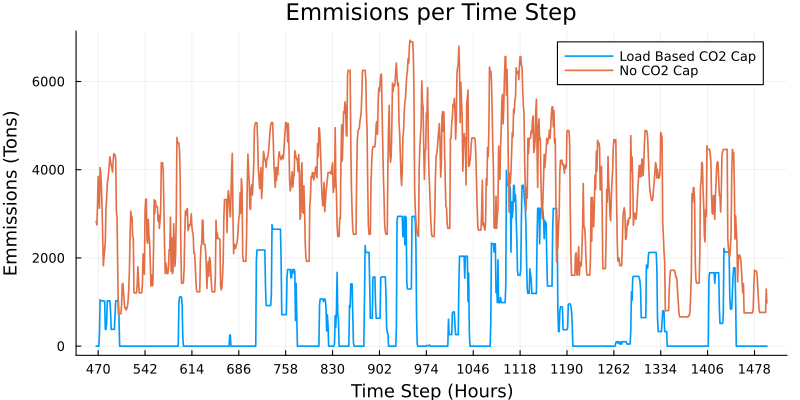

In [21]:
emm1sum = sum(eachcol(emm_tot));
emm2sum = sum(eachcol(emm_tot2));

Plots.plot(collect((tstart-3):(tend-3)),emm1sum[tstart:tend],size=(800,400),label="Load Based CO2 Cap",
    xlabel="Time Step (Hours)",ylabel="Emmissions (Tons)",thickness_scaling = 1.1,linewidth = 1.5,
    title="Emmisions per Time Step",xticks=tstart:72:tend)
Plots.plot!(collect((tstart-3):(tend-3)),emm2sum[tstart:tend],label="No CO2 Cap",linewidth = 1.5)